<a href="https://colab.research.google.com/github/Ember1995/goit-np-hw-01/blob/main/Spectral_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Завантаження даних
data_iris = load_iris()
data = data_iris.data
targets = data_iris.target

# Виведення опису даних
print(data_iris.DESCR)

# Виведення ознак
print("Ознаки (features):", data_iris.feature_names)

# Виведення цільових міток
print("Мітки (target):", data_iris.target_names)

# Виведення розмірності даних
print("Розмірність даних:", data_iris.data.shape)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
df = pd.DataFrame(data, columns=data_iris.feature_names)
df['target'] = targets
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Кількість спостережень на клас

In [ ]:
df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

Статистичні характеристики ознак

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Text(0.5, 1.02, 'Розподіл даних за targets')

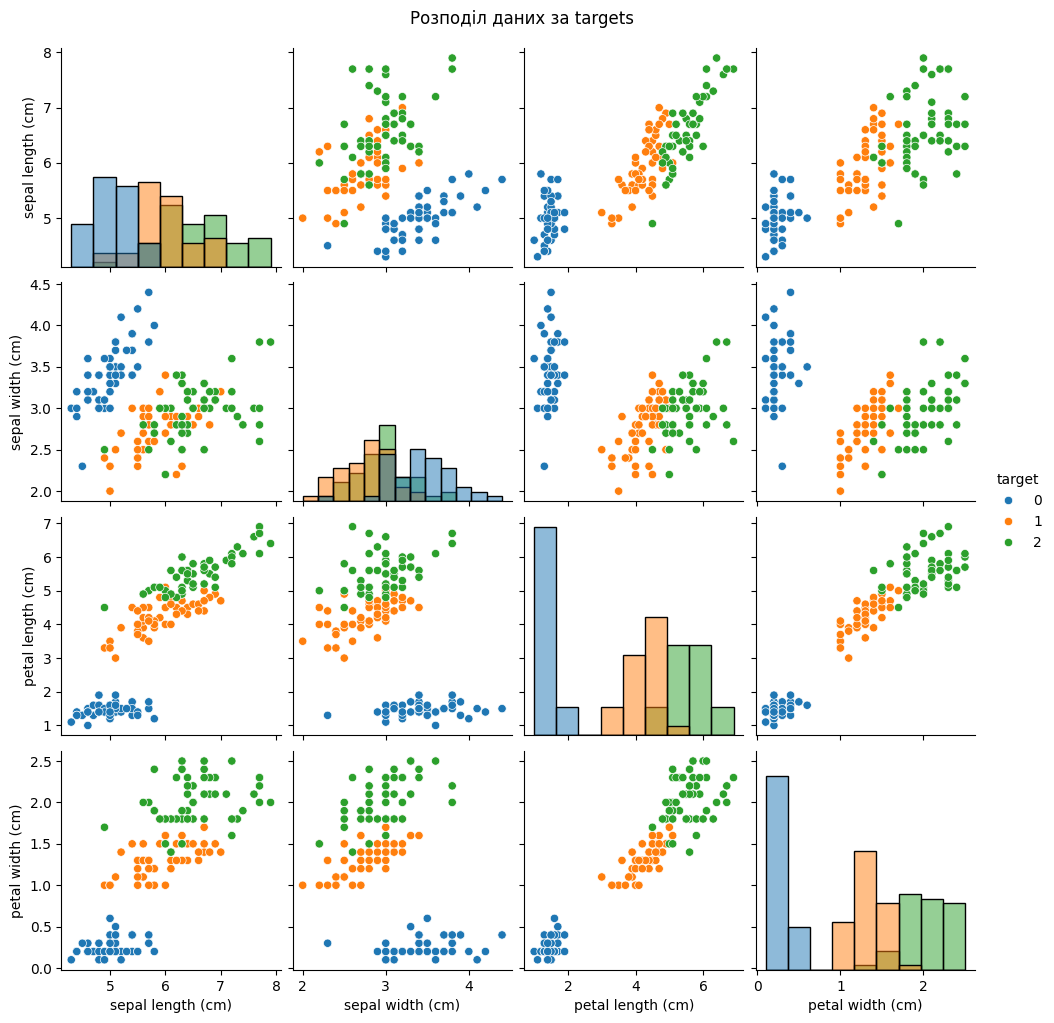

In [ ]:
import seaborn as sns

sns.pairplot(df, hue='target', palette= "tab10", diag_kind='hist')
plt.suptitle('Розподіл даних за targets', y=1.02)

Виділення ознак окремо для подальшої обробки

In [ ]:
features = df.iloc[:, :-1]
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Стандартизація даних

In [ ]:
# Створення об'єкта StandardScaler
scaler = StandardScaler()

# Підгонка і трансформація даних
scaled = scaler.fit_transform(features)

In [ ]:
# Створення DataFrame для стандартизованих даних
df_scaled = pd.DataFrame(scaled, columns=features.columns)
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Спектральна кластеризація

In [ ]:
# Спектральна кластеризація (3 кластера)
clustering = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=42).fit(df_scaled)
df_scaled['cluster'] = clustering.labels_

Порівняння спрогнозованих кластерів та дійсних класів

In [ ]:
# Порівняння спрогнозованих кластерів та дійсних класів
conf_matrix = confusion_matrix(targets, df_scaled['cluster'])
print("Confusion Matrix:")
print(conf_matrix)

# Корегування кластерів, бо нам важливі коректні назви класів для інтерпретації
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
mapping = dict(zip(col_ind, row_ind))
df_scaled['cluster'] = df_scaled['cluster'].map(mapping)

# Порівняння з коригованими кластерами
corrected_conf_matrix = confusion_matrix(targets, df_scaled['cluster'])
print("Corrected Confusion Matrix:")
print(corrected_conf_matrix)

Confusion Matrix:
[[ 0 50  0]
 [12  0 38]
 [39  0 11]]
Corrected Confusion Matrix:
[[50  0  0]
 [ 0 38 12]
 [ 0 11 39]]


Візуалізація даних

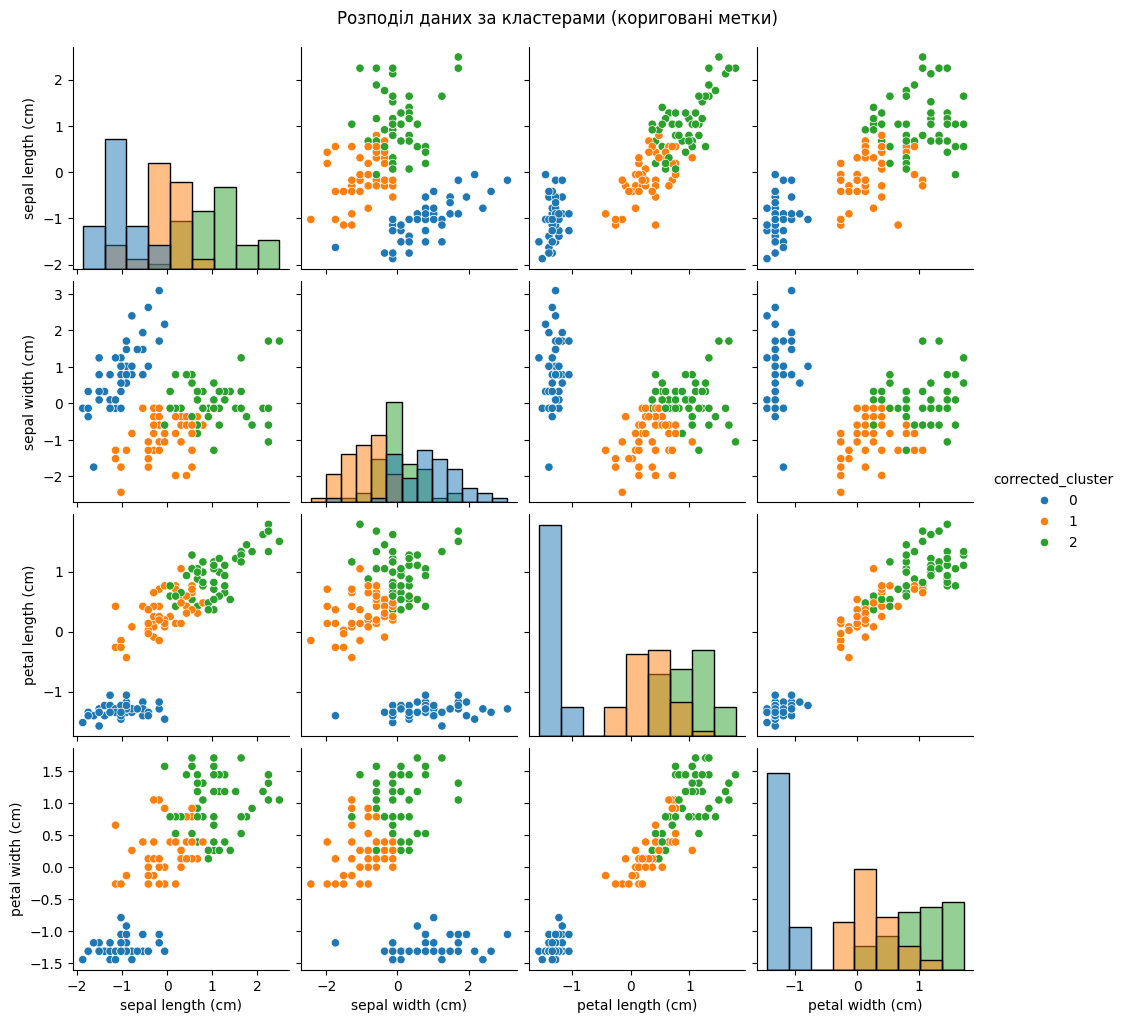

In [ ]:
# Візуалізація даних з використанням seaborn
df_visualize = df_scaled.drop(columns=['cluster'])
df_visualize['corrected_cluster'] = df_scaled['cluster']
sns.pairplot(df_visualize, hue='corrected_cluster', palette='tab10', diag_kind='hist')
plt.suptitle('Розподіл даних за кластерами (кориговані метки)', y=1.02)
plt.show()

### Висновки:

У нас було 3 класи:

                - Iris-Setosa - 50 зразків
                - Iris-Versicolour - 50 зразків
                - Iris-Virginica - 50 зразків

---
За результатами спектральної кластеризації ми отримали:

                - Iris-Setosa - всі 50 зразків достовірно класифіковані
                - Iris-Versicolour - достовірно класифіковано 38 зразків, 12 помилково класіфиковані як Iris-Virginica
                - Iris-Virginica - достовірно класифіковано 39 зразків, 11 помилково класіфиковані як Iris-Versicolour



Таким чином, наша конфузійна матриця демонструє, що модель добре справляється з класифікацією класу Iris-Setosa, але плутає між собою Iris-Versicolour та Iris-Virginica у значній кількості випадків.

Оскільки набір даних Iris є добре відомим і має в описі деталі про те, що один клас лінійно відділений від інших двох, а останні два класи не є лінійно відділеними один від одного, це пояснює, чому модель добре справляється з класифікацією Iris-Setosa, але має труднощі з класифікацією інших двох класів.

Тобто наша модель потребує вдосконалення для нелінійно повʼязаних між собою кластерів.
